In [15]:
import Magics.macro as magics
import cdsapi
import datetime
import ipywidgets as widgets
from ipywidgets import Layout, Button, Box, VBox

In [16]:
t_press = ['2m_dewpoint_temperature','2m_temperature','ice_temperature_layer_1',
            'ice_temperature_layer_2','ice_temperature_layer_3','ice_temperature_layer_4',
            'maximum_2m_temperature_since_previous_post_processing','mean_sea_level_pressure','minimum_2m_temperature_since_previous_post_processing',
            'sea_surface_temperature','skin_temperature','surface_pressure']
clouds = ['cloud_base_height','high_cloud_cover','low_cloud_cover',
            'medium_cloud_cover','total_cloud_cover','total_column_cloud_ice_water',
            'total_column_cloud_liquid_water','vertical_integral_of_divergence_of_cloud_frozen_water_flux','vertical_integral_of_divergence_of_cloud_liquid_water_flux',
            'vertical_integral_of_eastward_cloud_frozen_water_flux','vertical_integral_of_eastward_cloud_liquid_water_flux','vertical_integral_of_northward_cloud_frozen_water_flux',
            'vertical_integral_of_northward_cloud_liquid_water_flux']
lakes = ['lake_bottom_temperature','lake_cover','lake_depth',
            'lake_ice_depth','lake_ice_temperature','lake_mix_layer_depth',
            'lake_mix_layer_temperature','lake_shape_factor','lake_total_layer_temperature']
prec = ['convective_precipitation','convective_rain_rate','instantaneous_large_scale_surface_precipitation_fraction',
            'large_scale_precipitation','large_scale_precipitation_fraction','large_scale_rain_rate',
            'maximum_total_precipitation_rate_since_previous_post_processing','minimum_total_precipitation_rate_since_previous_post_processing','precipitation_type',
            'total_column_rain_water','total_precipitation']
snow = ['convective_snowfall','convective_snowfall_rate_water_equivalent','large_scale_snowfall',
            'large_scale_snowfall_rate_water_equivalent','snow_albedo','snow_density',
            'snow_depth','snow_evaporation','snowfall',
            'snowmelt','temperature_of_snow_layer','total_column_snow_water']
parameter_groups = {'Temperature and pressure' : t_press, 
                    'Clouds' : clouds, 
                    'Lakes' : lakes,
                    'Precipitation and rain' : prec,
                    'Snow' : snow}
types = ['ensemble_mean','ensemble_members','ensemble_spread',
            'reanalysis']
style = {'description_width': 'initial'}

In [34]:
group = widgets.Dropdown(options=parameter_groups,value = t_press,description='Group:', style=style)

parameters = widgets.Dropdown(options = t_press,description='Choose parameter:', style=style)


Type = widgets.Dropdown(options=types, value = 'reanalysis', description='Product types:', style=style)

times = widgets.BoundedIntText(
    value=12,
    min=0,
    max=24,
    step=1,
    description='Hour:',
    disabled=False
)

d = datetime.datetime(2017, 1, 1, 12)

dates = widgets.DatePicker(
    description='Pick a Date',
    value=d,
    disabled=False
)

items_auto = [parameters, Type, dates, times]

box_layout = Layout(display='flex',
                    flex_flow='row',
                    align_items='stretch',
                    width='100%')
box_auto = Box(children=items_auto, layout=box_layout)
display(group)
display(VBox([box_auto]))

def on_value_change(change):
        parameters.options=change["new"]
    

    

group.observe(on_value_change, names='value')




Dropdown(description='Group:', options={'Temperature and pressure': ['2m_dewpoint_temperature', '2m_temperatur…

In [18]:
one_group = group.value
parameters = widgets.Dropdown(options = one_group,description='Choose parameter:', style=style)

Type = widgets.Dropdown(options=types, value = 'reanalysis', description='Product types:', style=style)

times = widgets.BoundedIntText(
    value=12,
    min=0,
    max=24,
    step=1,
    description='Hour:',
    disabled=False
)

d = datetime.datetime(2017, 1, 1, 12)

dates = widgets.DatePicker(
    description='Pick a Date',
    value=d,
    disabled=False
)

items_auto = [parameters, Type, dates, times]
    
box_layout = Layout(display='flex',
                    flex_flow='row',
                    align_items='stretch',
                    width='100%')
box_auto = Box(children=items_auto, layout=box_layout)

VBox([box_auto])

In [19]:
c = cdsapi.Client()

a = c.retrieve(
    'reanalysis-era5-single-levels',
    {
        'variable':[
            parameters.value
        ],
            'grid': ['0.2', '0.2'],
            'product_type': Type.value,
            'year': dates.value.year,
            'month': dates.value.month,
            'day': dates.value.day,
            'time': times.value,
        'format':'grib'
    },
                "download.grib"
    )

2018-10-08 17:41:48,183 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2018-10-08 17:41:48,219 INFO Request is completed
2018-10-08 17:41:48,220 INFO Downloading http://136.156.132.110/cache-compute-0001/cache/data1/adaptor.mars.internal-1538987153.1609852-32006-9-c7f81a2d-9eed-4493-a68b-8f353281a2d9.grib to download.grib (3.1M)
2018-10-08 17:41:48,377 INFO Download rate 19.7M/s


In [20]:
data =  magics.mgrib(grib_input_file_name  = 'download.grib')

In [21]:
coast = magics.mcoast(map_grid =  "on",
                      map_grid_colour  =  "charcoal",
                      map_coastline_land_shade  =  'off',
                      map_coastline  =  'on',
                      map_coastline_land_shade_colour  =  'grey',
                      map_coastline_colour =  'charcoal',
            )

In [22]:
contour = magics.mcont(contour_automatic_setting = 'ecmwf')

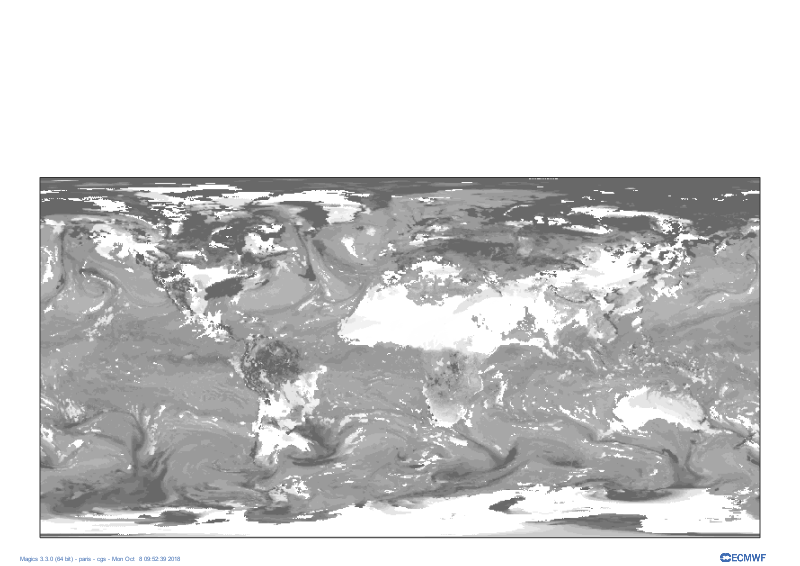

In [12]:
magics.plot(data, contour)

In [13]:
projection = magics.mmap(subpage_frame = "off",
                    subpage_upper_right_longitude = 40.,
                    subpage_upper_right_latitude = 75,
                    subpage_map_projection = "cylindrical",
                    subpage_lower_left_longitude = -25.,
                    subpage_lower_left_latitude = 35
                        )

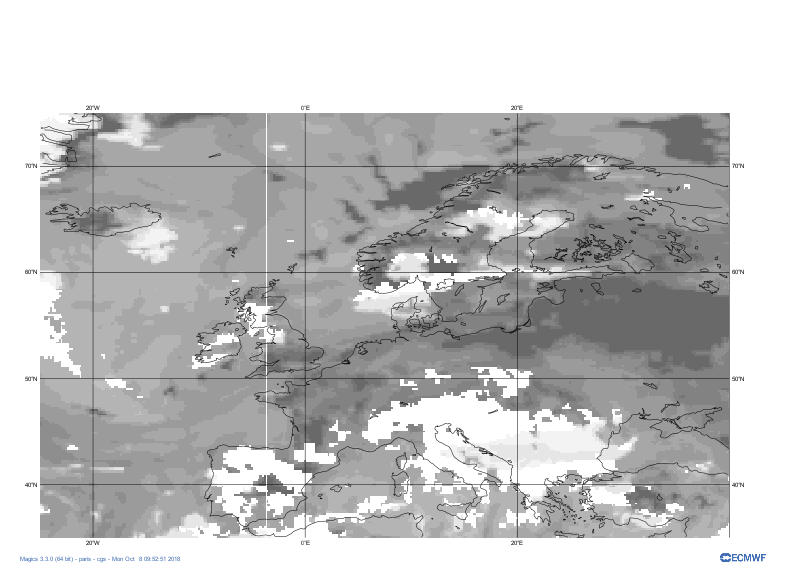

In [14]:
magics.plot(projection, data, contour, magics.mcoast())